In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # vectorized plots instead

## Matplotlib.pyplot

`matplotlib` is a powerful plotting library which implements a simple plotting interface `pyplot` which is similar to MATLAB's. In this lecture, we will work with this simple interface, which is significantly easier and more intuitive for those new to Python but who are familiar to MATLAB.

I add only as a footnote that a much more powerful set of features and fine-grain control is available to more advanced Python programmers willing to use the Matplotlib object-oriented interface.

### Line Plots

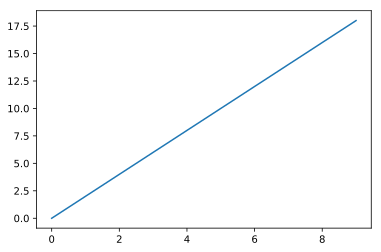

In [2]:
# simple plot 
a = np.arange(10)
plt.plot(a, 2*a)
plt.show()

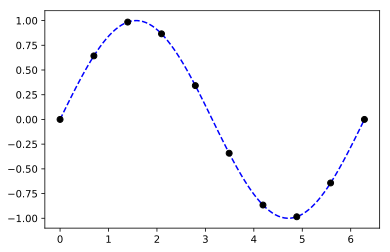

In [3]:
# plt.plot groups args in pairs with optional formatting strings
x = np.linspace(0, 2*np.pi, 100)
x_markers = np.linspace(0, 2*np.pi, 10)
plt.plot(x, np.sin(x), 'b--', x_markers, np.sin(x_markers), 'ko')
plt.show()


`plt.plot()` has 'hold on' by default, and you can continue adding plots, labels, titles, etc. When `plt.show()` is called, all the plot features will be added.

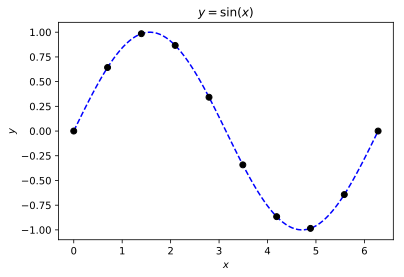

In [4]:
# plt.plot groups args in pairs with optional formatting strings
x = np.linspace(0, 2*np.pi, 100)
x_markers = np.linspace(0, 2*np.pi, 10)

# plot
plt.plot(x, np.sin(x), 'b--')
plt.plot(x_markers, np.sin(x_markers), 'ko')

# labels, titles, which can accept r'[latex]' formatted strings
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$y=\sin(x)$')

plt.show()

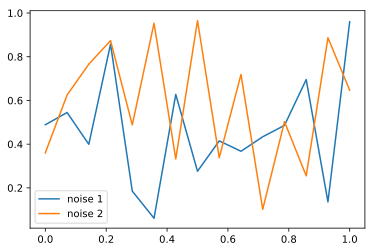

In [5]:
# add label keyword arguments to render a legend
N=15
x = np.linspace(0, 1,  N)
noise = np.random.rand(N)
noise2 = np.random.rand(N)

plt.plot(x, noise, label='noise 1')
plt.plot(x, noise2, label='noise 2')
plt.legend()
plt.show()


### Scatter plots

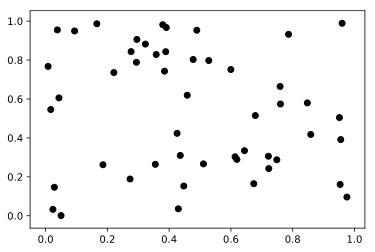

In [6]:
# scatter plot
N = 50
x, y = np.random.rand(N), np.random.rand(N)
plt.scatter(x, y, c='k')
plt.show()

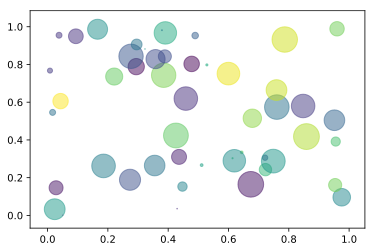

In [7]:
# scatter plot with vectors specifying color and area
colors = np.random.rand(N)
max_R = 15  # max radius 15 pt
areas = np.pi * (max_R * np.random.rand(N))**2

# adjust transparency with alpha
plt.scatter(x, y, s=areas, c=colors, alpha=0.5)
plt.show()

### Histograms

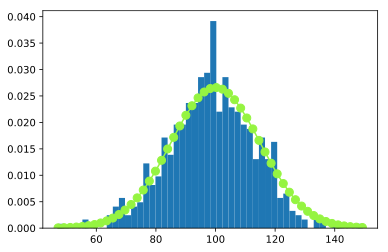

In [8]:
# histograms -- normal distribution
N, nbins = 600, 50
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(N)

# histogram
n, bins, patches = plt.hist(x, nbins, normed=1)

# best fit line
import matplotlib.mlab as mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, c='#95f441', marker='o', markersize=8)

plt.show()



### Seaborn aesthetics

Seaborn is a statistical visualization library with a nice set of defaults. Using it is easy.

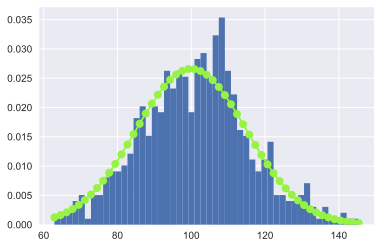

In [9]:
import seaborn as sns
sns.set()

# histograms -- normal distribution
N, nbins = 600, 50
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(N)

# histogram
n, bins, patches = plt.hist(x, nbins, normed=1)

# best fit line
import matplotlib.mlab as mlab
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, c='#95f441', marker='o', markersize=8)

plt.show()

## Into the third dimension

### surface plots from triangulations

In [36]:
# define nodes over a triangle
nodes = np.array([[-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,
        -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. , -0.6,
        -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. , -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. , -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,
         1. ,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  0.2,  0.4,  0.6,  0.8,
         1. ,  0.4,  0.6,  0.8,  1. ,  0.6,  0.8,  1. ,  0.8,  1. ,  1. ],
       [-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
        -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.4, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
        -0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0.2,  0.2,  0.2,
         0.2,  0.4,  0.4,  0.4,  0.4,  0.6,  0.6,  0.6,  0.8,  0.8,  1. ]])
nodes.shape

(2, 66)

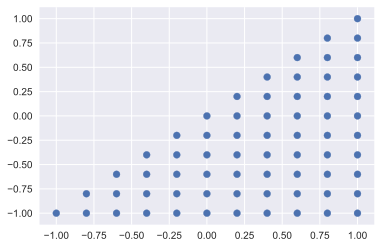

In [37]:
# look at nodes over the triangle
x, y = nodes[0,:], nodes[1,:]
plt.scatter(x, y)
plt.show()

Let's define a triangulation over our nodes, then make a 3d surface plot.

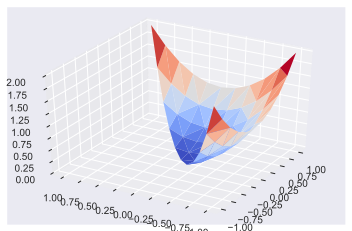

In [38]:
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
z = x ** 2 + y ** 2

tri = mtri.Triangulation(x, y)
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2,1, projection='3d')
ax.plot_trisurf(tri, z, cmap=plt.cm.coolwarm)
ax.view_init(35, 210)
plt.show()